In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [2]:
data={
    'Experiance':[1,2,3,4,5,6,7,8,9,10],
    'Salary':[45000,50000,60000,65000,70000,75000,80000,85000,90000,95000]
}
df=pd.DataFrame(data)
display(df)

,Experiance,Salary
0,1,45000
1,2,50000
2,3,60000
3,4,65000
4,5,70000
5,6,75000
6,7,80000
7,8,85000
8,9,90000
9,10,95000


In [7]:
#linear regression
x=df['Experiance']
y=df['Salary']


In [13]:
poly=PolynomialFeatures(degree=2)
x_poly=poly.fit_transform(x.to_frame())

In [15]:
xtrain,xtest,ytrain,ytest=train_test_split(x_poly,y,test_size=0.3,random_state=42)

In [19]:
reg=LinearRegression()
reg.fit(xtrain,ytrain)
intercept=reg.intercept_
coefficient=reg.coef_
print(intercept,coefficient)
y_pred=reg.predict(xtest)
print(y_pred)

39013.62260343102 [   0.         6961.40262361 -142.53279516]
[90121.08980827 52366.29667003 75650.85771948]


In [21]:
mae=mean_absolute_error(ytest,y_pred)
mse=mean_squared_error(ytest,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(ytest,y_pred)
print(mae,"\n",mse,"\n",rmse,"\n",r2)

1046.0813992600113 
 2012546.1477550447 
 1418.6423607643487 
 0.9926069733347774


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


The Kmeans algorithm stopped after 3 iterations
Tolerance  0.001


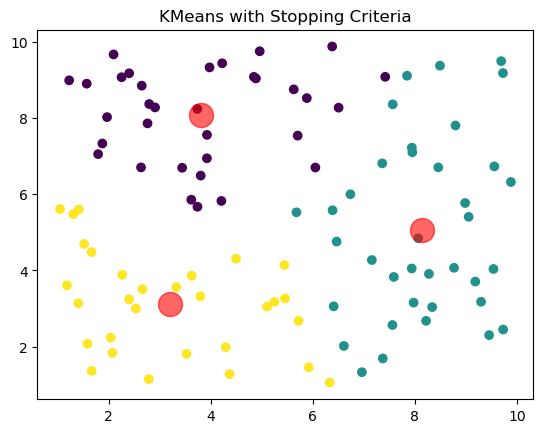

center:  [[3.81377151 8.08384592]
 [8.13602047 5.06451578]
 [3.20918172 3.12981839]]
labels:  [2 1 1 1 0 2 2 1 1 1 2 1 1 0 0 0 0 2 0 0 0 0 2 2 2 1 0 0 2 2 1 2 2 1 1 1 0
 0 1 0 0 2 2 1 2 1 0 1 2 2 1 1 1 1 0 1 0 0 2 0 2 0 1 0 2 0 2 1 2 1 1 2 2 1
 1 1 1 2 0 2 1 1 0 0 2 0 1 1 1 2 2 0 1 0 1 2 0 0 0 0]


In [23]:
#clusterring
#KMeans with Stopping Criteria
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

np.random.seed(42)
data_dict={
    'feature1':np.random.uniform(1,10,100),
    'feature2':np.random.uniform(1,10,100)
}

x=np.array(list(zip(data_dict['feature1'],data_dict['feature2'])))

km=KMeans(n_clusters=3,max_iter=300,tol=0.001,random_state=42)

km.fit(x)
center=km.cluster_centers_
labels=km.labels_

print(f"The Kmeans algorithm stopped after {km.n_iter_} iterations")
print("Tolerance ", km.tol)

plt.scatter(x[:,0], x[:,1], c=labels)
plt.scatter(center[:,0], center[:,1], c='red', s=300, alpha=0.6)
plt.title("KMeans with Stopping Criteria")
plt.show()
print("center: ",center)
print("labels: ",labels)


[[2.         3.         2.6703737  2.        ]
 [4.         5.         4.0984102  3.        ]
 [0.         6.         4.48522739 4.        ]
 [1.         7.         5.25990708 5.        ]]


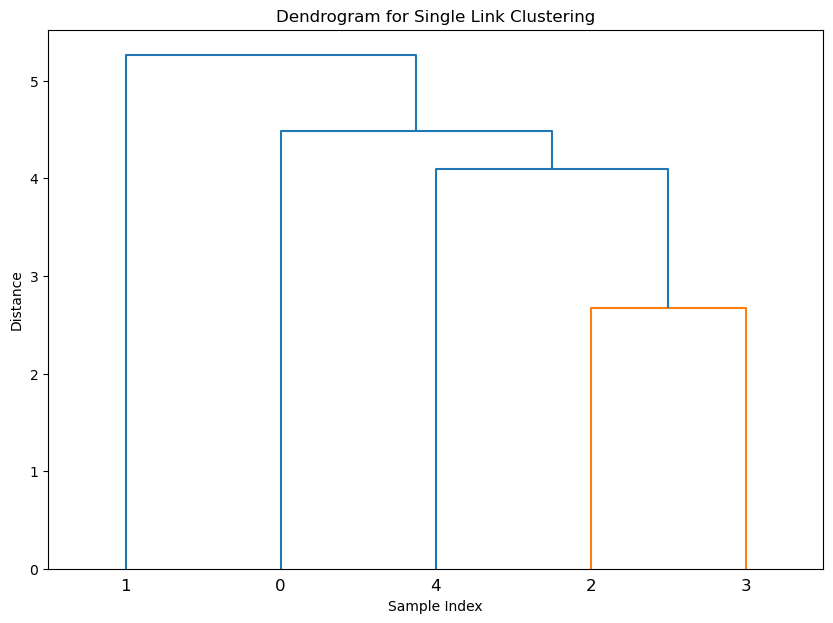

In [25]:
#Single-Link Clustering- Euclidean

import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

np.random.seed(42)
data_dict={
    'feature1':np.random.uniform(1,10,5),
    'feature2':np.random.uniform(1,10,5)
}
x=np.array(list(zip(data_dict['feature1'], data_dict['feature2'])))

linked_euclidean = linkage(x, method='single', metric='euclidean')
print(linked_euclidean)

plt.figure(figsize=(10,7))
dendrogram(linked_euclidean , orientation='top', labels=np.arange(0,5), distance_sort='ascending', show_leaf_counts=True)
plt.title("Dendrogram for Single Link Clustering")
plt.xlabel("Sample Index")
plt.ylabel('Distance')
plt.show()


[[ 2.          3.          3.58556932  2.        ]
 [ 0.          1.          6.06676586  2.        ]
 [ 4.          5.          6.60670982  3.        ]
 [ 6.          7.         13.00216168  5.        ]]


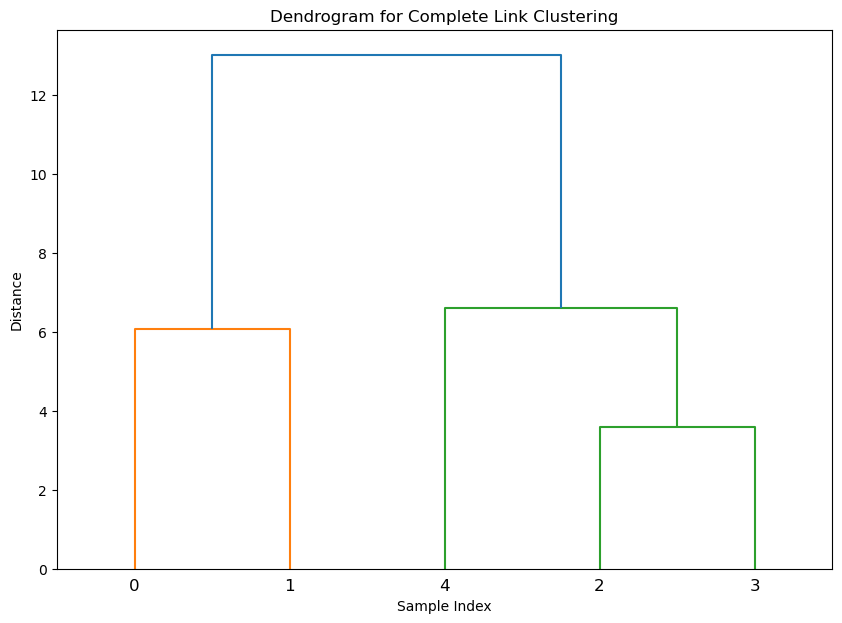

In [27]:
#Complete-Link Clustering- Manhattan

import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

np.random.seed(42)
data_dict={
    'feature1':np.random.uniform(1,10,5),
    'feature2':np.random.uniform(1,10,5)
}
x=np.array(list(zip(data_dict['feature1'], data_dict['feature2'])))

linked_euclidean = linkage(x, method='complete', metric='cityblock')
print(linked_euclidean)

plt.figure(figsize=(10,7))
dendrogram(linked_euclidean , orientation='top', labels=np.arange(0,5), distance_sort='ascending', show_leaf_counts=True)
plt.title("Dendrogram for Complete Link Clustering")
plt.xlabel("Sample Index")
plt.ylabel('Distance')
plt.show()


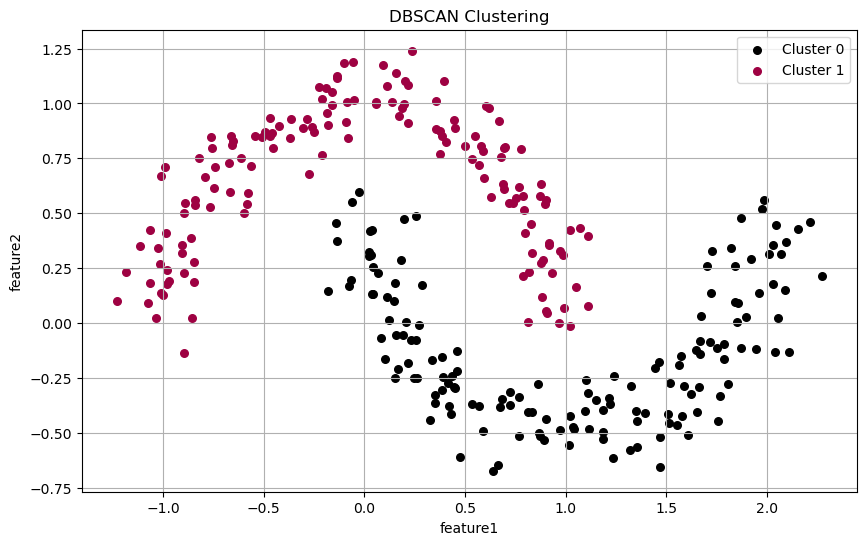

In [29]:
#DBSCAN
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

x,_ = make_moons(n_samples=300, noise=0.1, random_state=42)

db=DBSCAN(eps=0.2, min_samples=5)
labels=db.fit_predict(x)

colors= ['k']+[plt.cm.Spectral(i/10) for i in range(len(set(labels))-1)]

plt.figure(figsize=(10,6))
u_labels=set(labels)

for k in u_labels:
    plt.scatter(x[labels==k][:,0], x[labels==k][:,1], color=colors[k], label=f'Cluster {k}', s=30)

plt.title("DBSCAN Clustering")
plt.xlabel("feature1")
plt.ylabel('feature2')
plt.legend()
plt.grid(True)
plt.show()